\begin{center}
Gabe Morris
\end{center}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from eng_analysis import runge_kutta, CubicSpline, newton_raphson

plt.style.use('../maroon_ipynb.mplstyle')

Click [here](https://github.com/gabemorris12/eng_analysis) to view the source code of the engineering analysis package.

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Exam 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
The crank $AB$ of length $R=80\,mm$ is rotating at a constant angular speed of $\frac{d\theta}{dt}=6000\,RPM$. The position of the piston $C$, is constrained to move along the horizontal axis. Determine the position of the piston, $x$, as a function of the angle and find the acceleration of the piston, $\ddot{x}$, for angles from $0^\circ$ to $180^\circ$ using numerical differentiation. Plot the acceleration as a function of the angle.

![Figure 1](f1.PNG)

## Solution
This is a classic mechanism problem and can be solved using vector loop methods. Since this problem is quite simple, a free body diagram is not needed. There are two unknowns - the length of the vector $\vec{c}$ going from $A$ to $C$ and the angle of vector $\vec{b}$ going from $B$ to $C$ (denoted as $\theta_2$ below). You can use the complex vector notation and the single vector loop to determine $x(\theta)$ where $\theta$ is a function of time and is the angle of $\vec{a}$ going from $A$ to $B$.

In [2]:
# Some constants
R_ = 80  # mm
speed = 6000  # RPM

# Make symbols and functions
t, R, th, th2, x = sp.symbols(r't R \theta \theta_2 x', real=True)

# Make complex vectors
a = R*sp.exp(sp.I*th)
b = sp.S('2.5')*R*sp.exp(sp.I*th2)
c = x*sp.exp(sp.I*0)

loop = a + b - c
eq1 = sp.Eq(sp.re(loop), 0)  # real part
eq2 = sp.Eq(sp.im(loop), 0)  # imaginary part
display(eq1, eq2)

Eq(R*cos(\theta) + 2.5*R*cos(\theta_2) - x, 0)

Eq(R*sin(\theta) + 2.5*R*sin(\theta_2), 0)

We can now solve for our unknowns ($\theta_2$ and $x$).

In [3]:
sol = sp.solve([eq1, eq2], [x, th2], dict=True)[1]
for key, value in sol.items():
    display(sp.Eq(key, value))

Eq(\theta_2, -asin(0.4*sin(\theta)))

Eq(x, 0.5*R*(5.0*sqrt(1 - 0.16*sin(\theta)**2) + 2.0*cos(\theta)))

We now have $x(\theta)$ above, but we can easily figure out $x(t)$ by using the known information on the crank. Since it rotates at a constant speed, we can integrate to find $\theta(t)$ and substitute this into $x(\theta)$ to get $x(t)$.

In [4]:
th_t = speed*sp.pi/30*t  # theta in radians
th_t

200*pi*t

In [5]:
x_t = sol[x].subs(th, th_t)
x_t

0.5*R*(5.0*sqrt(1 - 0.16*sin(200*pi*t)**2) + 2.0*cos(200*pi*t))

We can get the analytical solution for $\ddot{x}$ easily using sympy.

In [6]:
x_ddot = x_t.diff(t, 2)
x_ddot

-0.5*pi**2*R*(80000.0*cos(200*pi*t) - 32000.0*sin(200*pi*t)**2/sqrt(1 - 0.16*sin(200*pi*t)**2) + 32000.0*cos(200*pi*t)**2/sqrt(1 - 0.16*sin(200*pi*t)**2) + 5120.0*sin(200*pi*t)**2*cos(200*pi*t)**2/(1 - 0.16*sin(200*pi*t)**2)**(3/2))

I'll use this to check, but finding the numerical derivative is done by applying the following relationship:

$$f''(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$

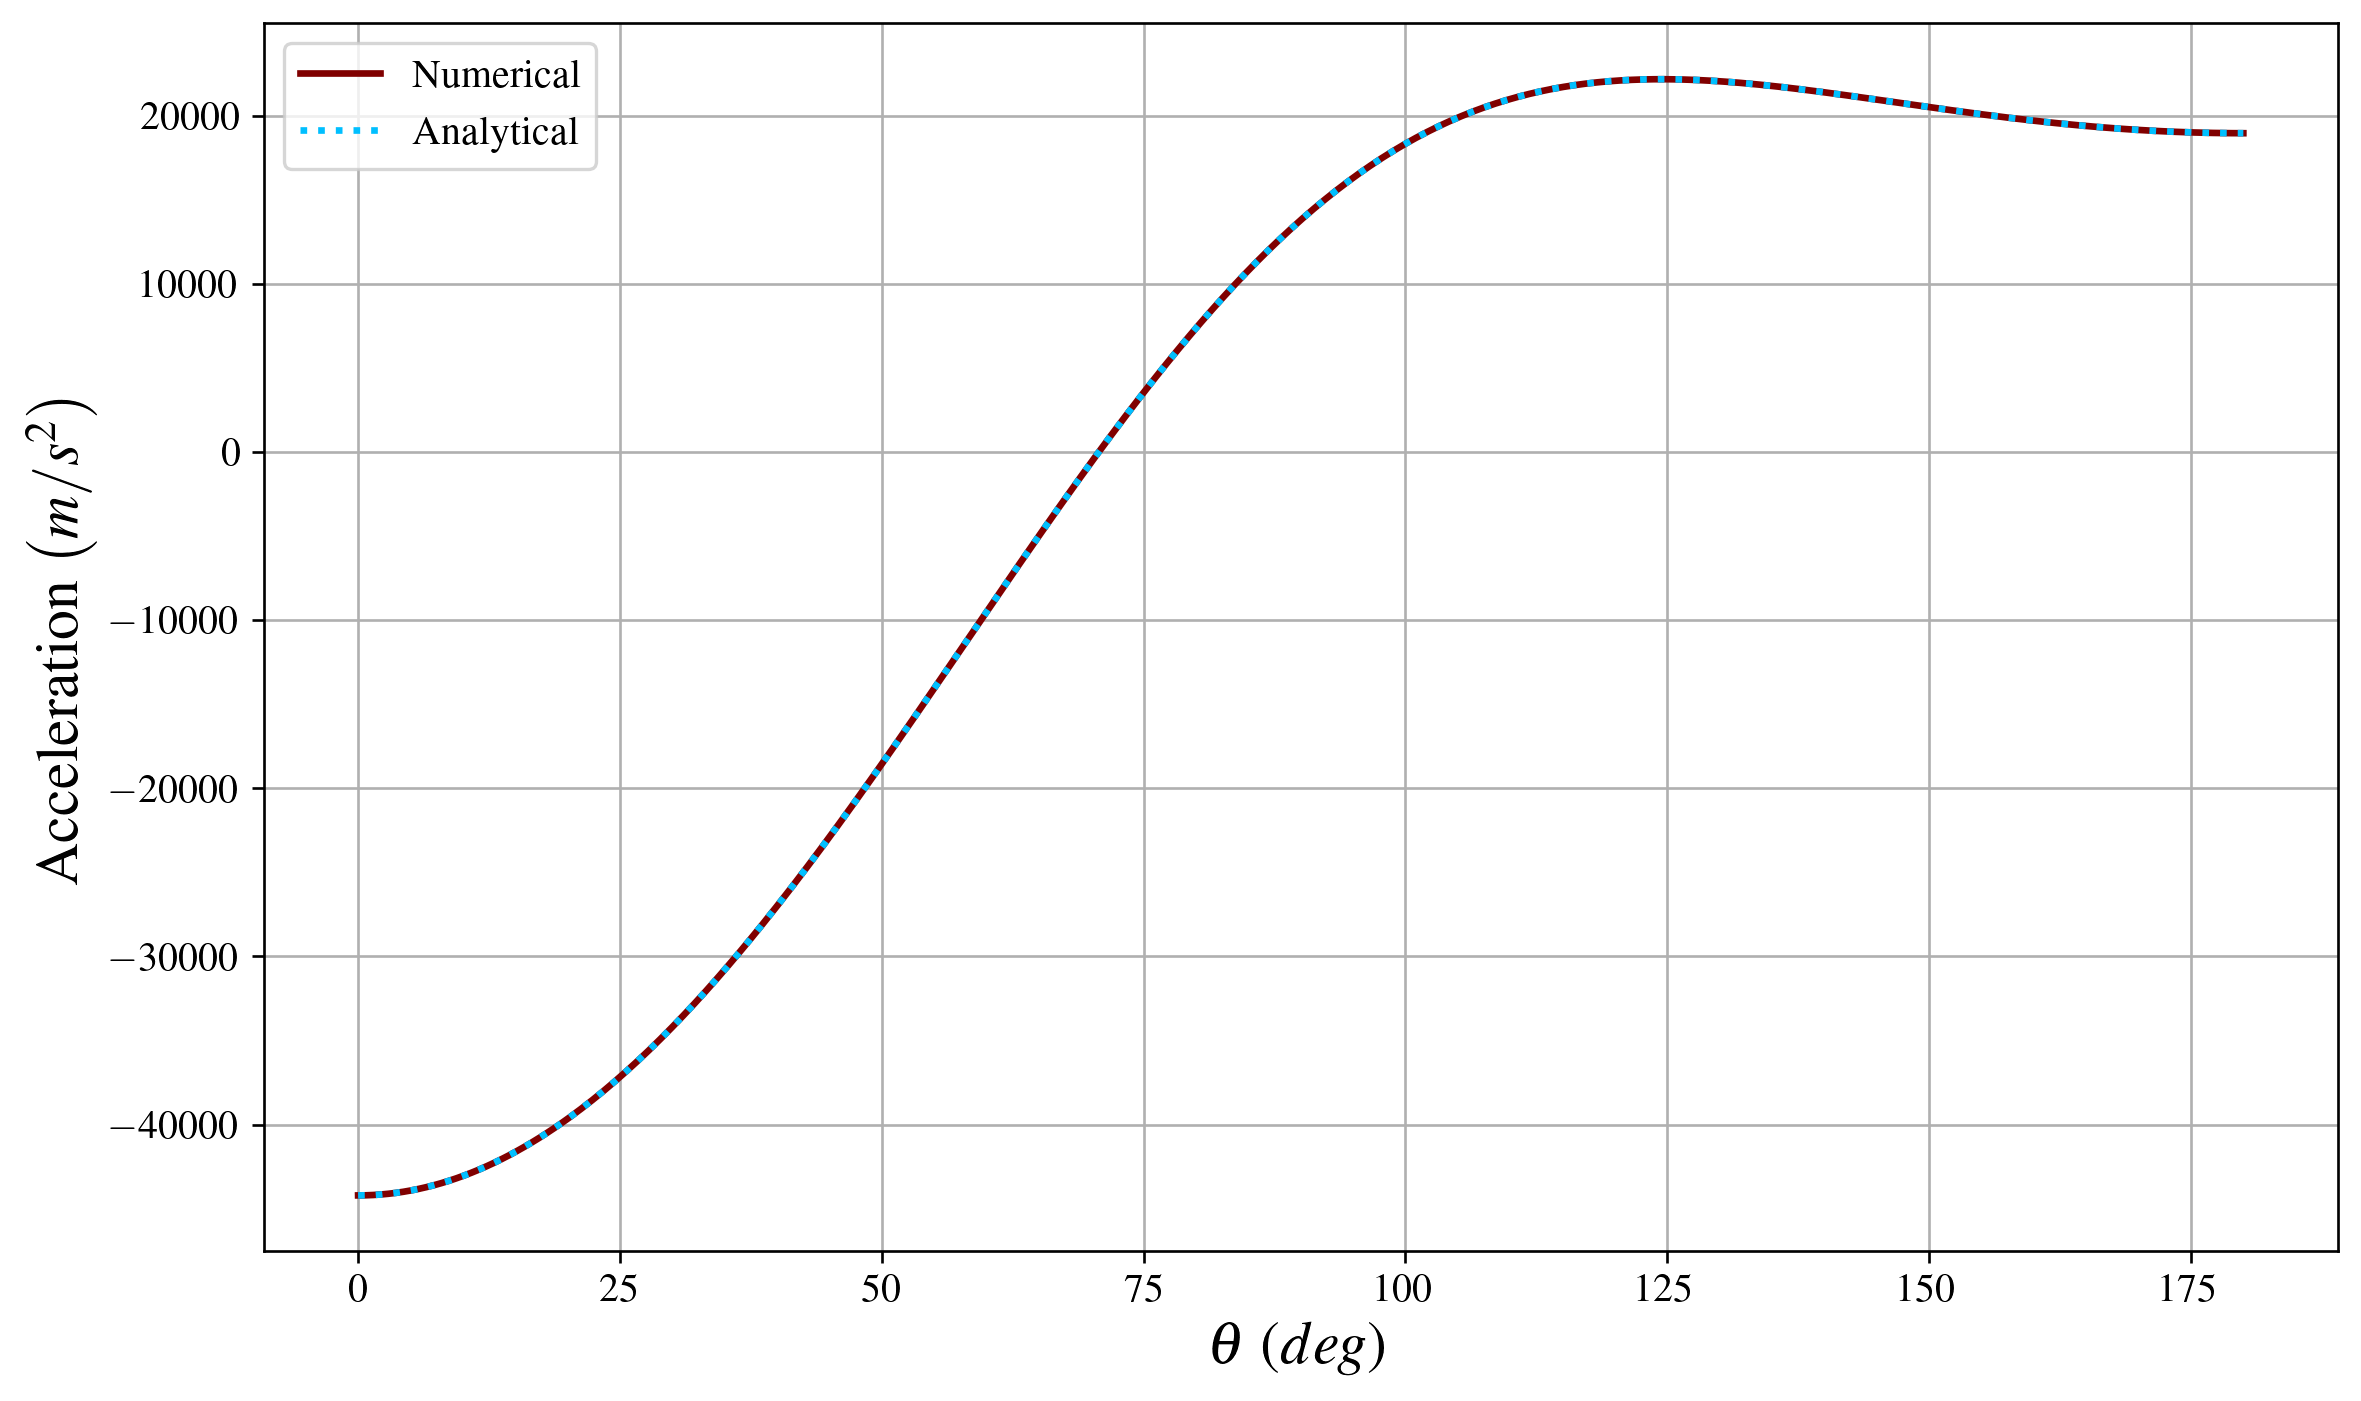

In [7]:
# Getting the solution
x_lamb = sp.lambdify(t, x_t.subs(R, R_), modules='numpy')
x_ddot_lamb = sp.lambdify(t, x_ddot.subs(R, R_), modules='numpy')

t_array = np.linspace(0, 30/speed, 500)
thetas = speed*np.pi/30*t_array
h = t_array[1] - t_array[0]
x_ddot_numerical = (x_lamb(t_array + h) - 2*x_lamb(t_array) + x_lamb(t_array - h))/h**2

plt.plot(np.rad2deg(thetas), np.array(x_ddot_numerical)/1000, label='Numerical')
plt.plot(np.rad2deg(thetas), x_ddot_lamb(t_array)/1000, label='Analytical', ls=':', color='deepskyblue')
plt.ylabel(r'Acceleration $\left(m/s^2\right)$')
plt.xlabel(r'$\theta$ ($deg$)')
plt.legend()
plt.show()

One of my favorite projects that I've done is the automation of mechanisms. I made a free open-source python package that can be seen [here](https://github.com/gabemorris12/mechanism). It does many things, but you should run `pip install mechanism`, then run the following code cell for an animation. Use your mouse buttons to pause and play the animation and go frame by frame. Sometimes you have to make sure that your IDE allows for animations.

In [8]:
# import matplotlib.pyplot as plt
# import numpy as np
# from mechanism import *
# 
# # Constants
# R = 80  # mm
# speed = 6_000  # RPM
# 
# A, B, C = get_joints('A B C')
# 
# a = Vector((A, B), r=R)
# b = Vector((B, C), r=2.5*R)
# c = Vector((A, C), theta=0, style='ground')
# 
# 
# def loop(x, inp):
#     return a(inp) + b(x[0]) - c(x[1])
# 
# 
# t = np.linspace(0, 30/speed, 500)
# theta = speed*np.pi/30*t
# omega = np.full(t.shape, speed*np.pi/30)
# alpha = np.zeros(t.shape)
# 
# pos_guess = [100, 0]
# vel_guess = [1, 1]
# acc_guess = [1, 1]
# 
# mech = Mechanism(vectors=[a, b, c], origin=A, loops=loop, pos=theta, vel=omega, acc=alpha,
#                  guess=(pos_guess, vel_guess, acc_guess))
# mech.iterate()
# 
# ani, fig, ax = mech.get_animation(velocity=True, acceleration=True, stamp=np.rad2deg(theta), interval=0, cushion=10,
#                                   stamp_loc=(0.9, 0.9))
# 
# fig2, ax2 = plt.subplots()
# ax2.plot(np.rad2deg(a.pos.thetas), c.acc.r_ddots/1000, color='maroon')
# ax2.grid()
# 
# plt.show()

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Exam 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2
Use the Gauss-Chebyshev quadrature to evaluate the following integral. Compare it to the exact answer. You will need to use a variable transformation. If your answer differs from this value, explain why.

$$\int_0^{\frac{\pi}{2}}\frac{dx}{\sqrt{\sin(x)}}$$

In [9]:
x = sp.Symbol('x')
integral = sp.Integral(1/sp.sqrt(sp.sin(x)), (x, 0, sp.pi/2))
integral

Integral(1/sqrt(sin(x)), (x, 0, pi/2))

In [10]:
answer = integral.doit().n()
answer

2.62205755429212

## Solution
The Gauss-Chebyshev Quadrature is found by transforming the integral into a form like so,

$$
\int_{-1}^1\left(1-x^2\right)^{-1 / 2} f(x) d x \approx \frac{\pi}{n+1} \sum_{i=0}^n f\left(x_i\right)
$$

and $x_i$ is

$$x_i=\cos\left(\frac{(2i+1)\pi}{2n+2}\right)$$

We can use $\sin(x)=t^2$ for our transformation. If this is our substitution, then

$$
\begin{gathered}
\sin(x)=t^2 \\
\cos(x)dx=2tdt
\end{gathered}
$$

We also know that $\cos(x)=\sqrt{1-\sin(x)^2}$, so the substitution then becomes

$$
\begin{gathered}
\sqrt{1-t^4}dx=\sqrt{\left(1-t^2\right)\left(1+t^2\right)}dx=2tdt \\
dx=\frac{2t}{\sqrt{\left(1-t^2\right)\left(1+t^2\right)}}dt
\end{gathered}
$$

Finally, by substituting in for $dx$ above and by substituting in the $t^2$ for $\sin(x)$ in the integrand as well as the limits of integration, the integral becomes

$$2\int_0^1\frac{dt}{\sqrt{\left(1-t^2\right)\left(1+t^2\right)}}dt$$

The integrand is an even function ($f(-x)=f(x)$) and is therefore equal to

$$\int_{-1}^1\frac{dt}{\sqrt{\left(1-t^2\right)\left(1+t^2\right)}}dt$$

This means that $f(x)$ in the original equation is $f(x)=\frac{1}{\sqrt{1+t^2}}$.

In [11]:
# Applying the relationship
n = 7
f = lambda x_: 1/np.sqrt(1 + x_**2)
i = np.arange(n + 1)
xi = np.cos(np.pi*(2*i + 1)/(2*n + 2))
value = np.pi/(n + 1)*sum(f(xi))
value

2.622056775816561

In [12]:
# Error for n = 7
abs((value - float(answer))/float(answer)*100)  # %

2.9689491651634128e-05

As seen above, the answer is off by a very small value for $n=7$. The reason why there is error in this method is that the function $f(x)$ is not a polynomial, and the original integrand contains a singularity at $x=0$.

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Exam 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3
The mass $m$ is suspended from an elastic cord with stiffness $k$ and undeformed length $L$. If the mass is released from rest at $\theta(0)=45^\circ$ with the cord unstretched, find the length $r$ of the cord when the mass first crosses the vertical ($\theta=0^\circ$). 

![Figure 2](f2.PNG)

The equations of motion are as follows:

$$
\begin{gathered}
\ddot{r} = r \dot{\theta}^2+g \cos \theta-\frac{k}{m}(r-L) \\
\ddot{\theta} = \frac{-2 \dot{r} \dot{\theta}-g \sin \theta}{r}
\end{gathered}
$$

Use $g=9.80665\,m/s^2$, $k=30\,N/m$, $L=0.4\,m$, and $m=0.2\,kg$.

## Solution
We first need to put the system in the state variable form.

In [13]:
g_ = 9.80665  # m/s^2
k_ = 30  # N/m
L_ = 0.4  # m
m_ = 0.2  # kg

g, k, L, m, t = sp.symbols('g k L m t')
r = sp.Function('r')(t)
th = sp.Function(r'\theta')(t)

eq1 = sp.Eq(r.diff(t, 2), r*th.diff()**2 + g*sp.cos(th) - k/m*(r - L))
eq2 = sp.Eq(th.diff(t, 2), (-2*r.diff()*th.diff() - g*sp.sin(th))/r)
display(eq1, eq2)

Eq(Derivative(r(t), (t, 2)), g*cos(\theta(t)) - k*(-L + r(t))/m + r(t)*Derivative(\theta(t), t)**2)

Eq(Derivative(\theta(t), (t, 2)), (-g*sin(\theta(t)) - 2*Derivative(\theta(t), t)*Derivative(r(t), t))/r(t))

To make things easier, I will represent all the dependent variables as $y$. 

In [14]:
y0, y1, y2, y3 = sp.Function('y0')(t), sp.Function('y1')(t), sp.Function('y2')(t), sp.Function('y3')(t)

eq3 = sp.Eq(y0.diff(), y2)
eq4 = sp.Eq(y1.diff(), y3)

sub_states = [
    (r, y0),
    (th, y1),
    (y0.diff(t, 2), y2.diff()),
    (y0.diff(), y2),
    (y1.diff(t, 2), y3.diff()),
    (y1.diff(), y3)
]

sol = sp.solve([eq1.subs(sub_states), eq2.subs(sub_states), eq3, eq4], [y0.diff(), y1.diff(), y2.diff(), y3.diff()])
for key, value in sol.items(): display(sp.Eq(key, value))

Eq(Derivative(y0(t), t), y2(t))

Eq(Derivative(y1(t), t), y3(t))

Eq(Derivative(y2(t), t), L*k/m + g*cos(y1(t)) - k*y0(t)/m + y0(t)*y3(t)**2)

Eq(Derivative(y3(t), t), -g*sin(y1(t))/y0(t) - 2*y2(t)*y3(t)/y0(t))

The plot below will show the results and the length at $\theta=0$.

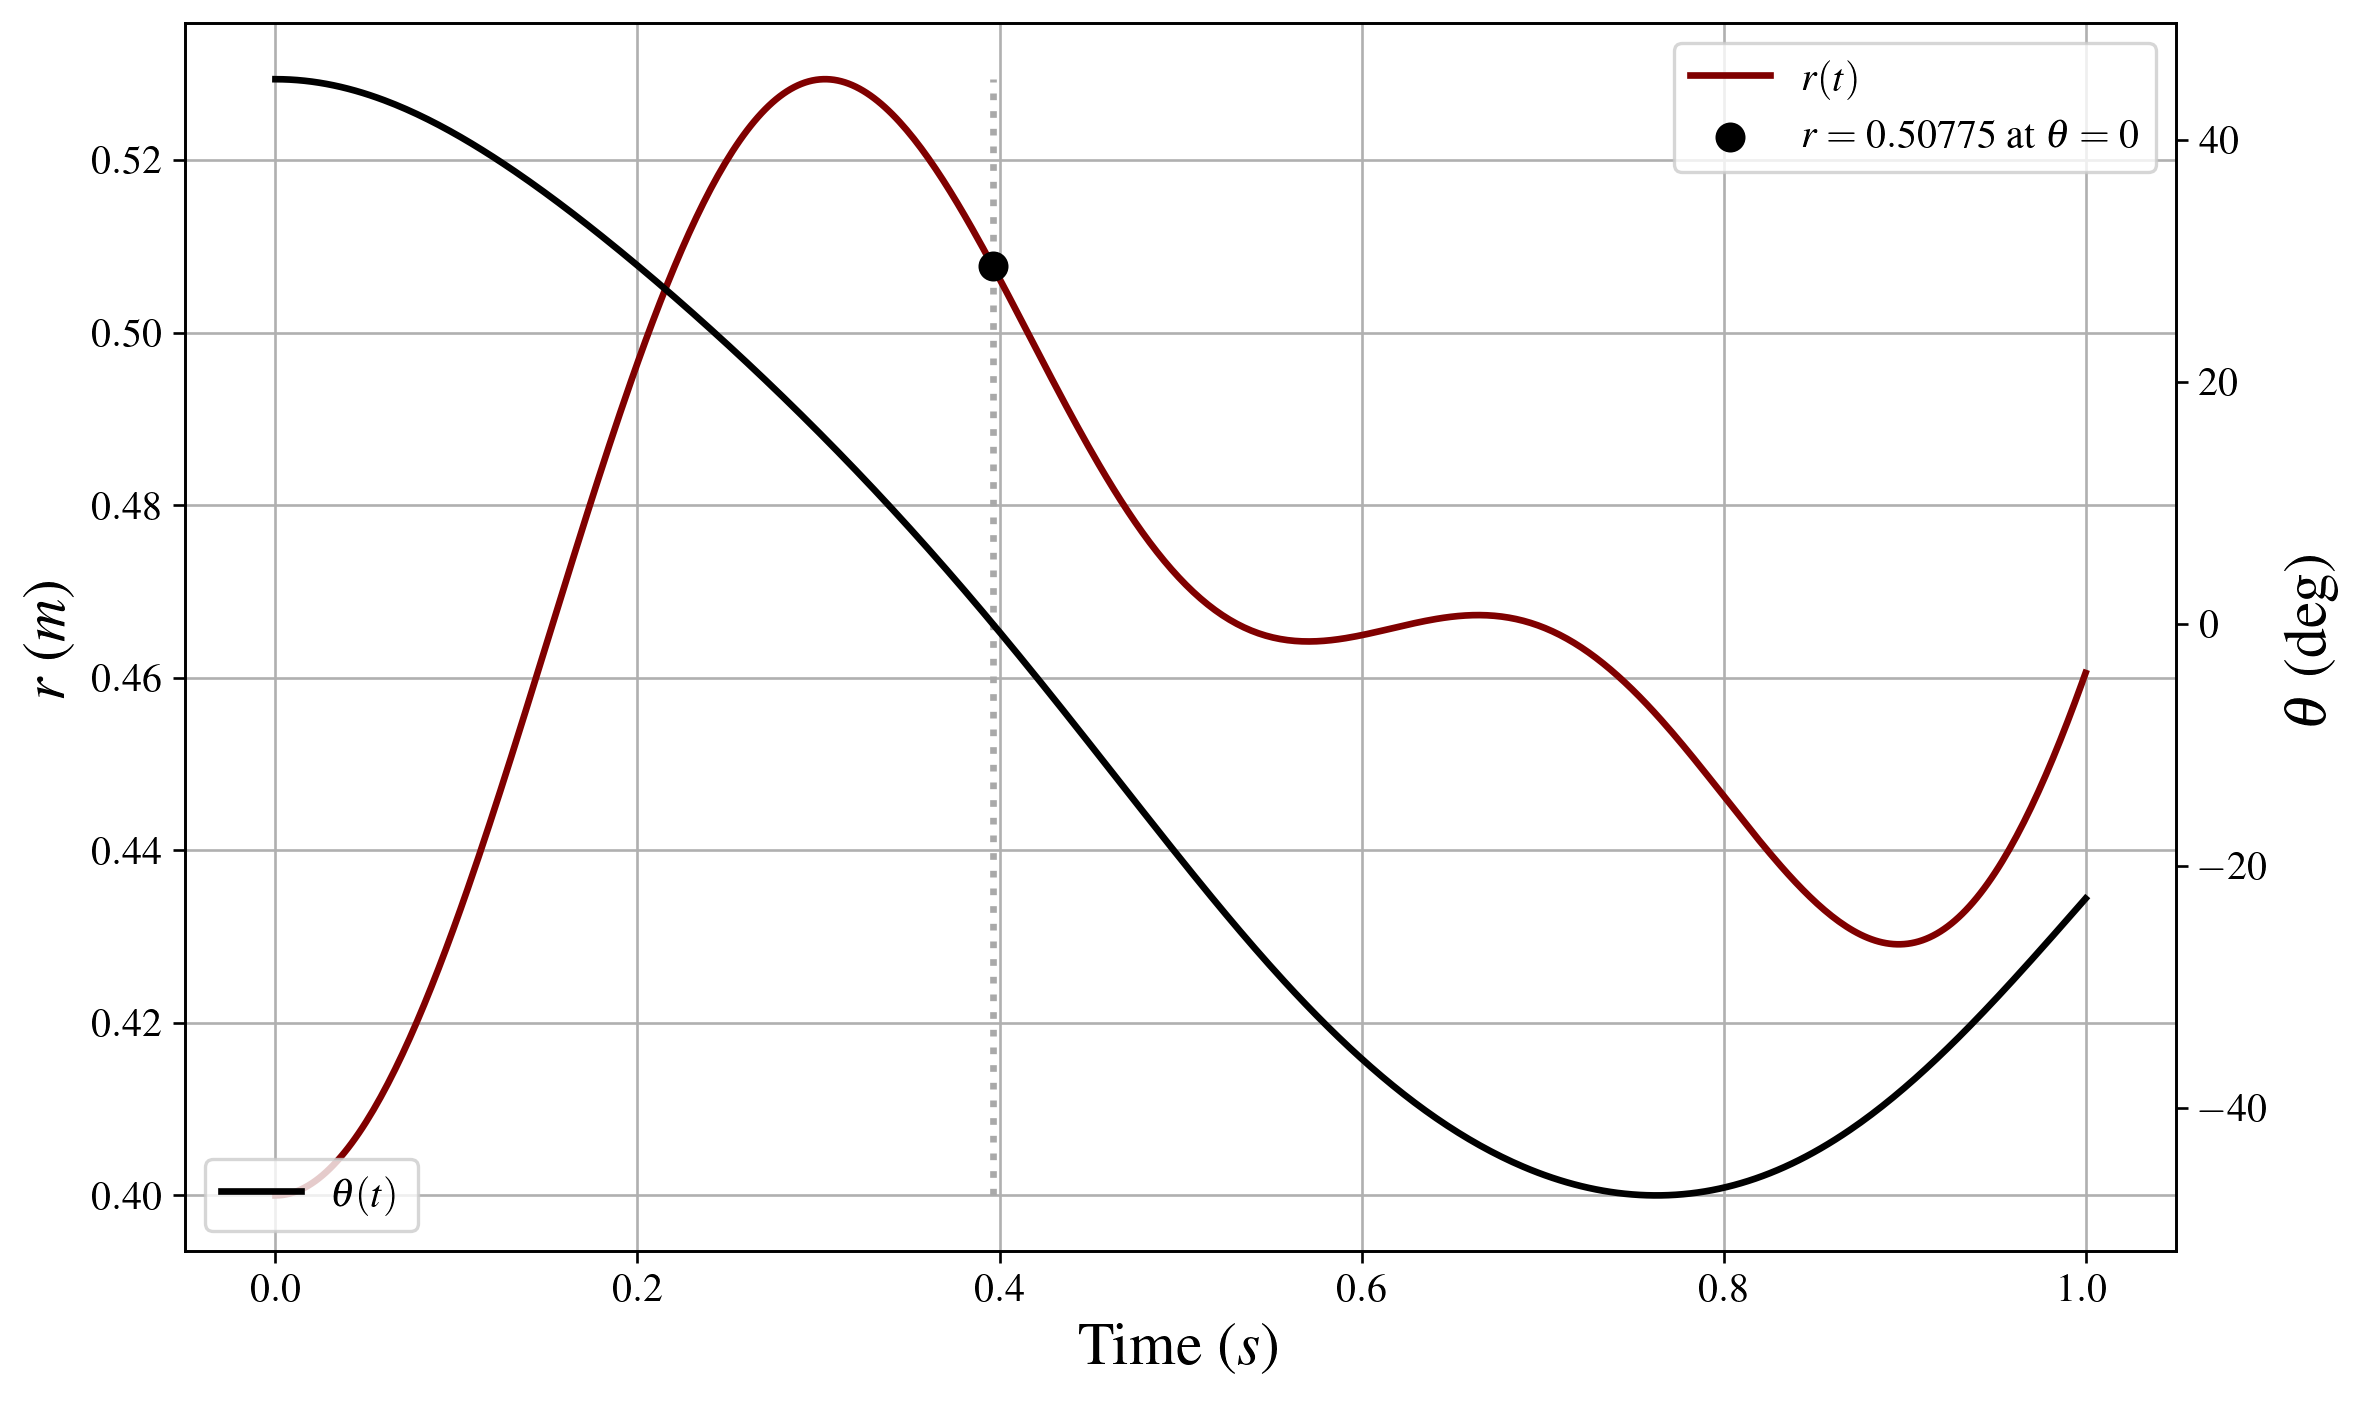

In [15]:
# Now we can solve
def state_vars(y, _):
    return [
        y[2],
        y[3],
        L_*k_/m_ + g_*np.cos(y[1]) - k_*y[0]/m_ + y[0]*y[3]**2,
        -g_*np.sin(y[1])/y[0] - 2*y[2]*y[3]/y[0]
    ]

t_array = np.linspace(0, 1, 500)
sol = runge_kutta(state_vars, (L_, np.deg2rad(45), 0, 0), t_array)
r_values = sol[0]
theta_values = sol[1]

theta_spline = CubicSpline(t_array, theta_values)
r_spline = CubicSpline(t_array, r_values)
t_0 = newton_raphson(theta_spline, [0.5])[0]
r_0 = r_spline(t_0)

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.grid(False)

ax.plot(t_array, r_values, zorder=2, label='$r(t)$')
ax.plot([t_0, t_0], [min(r_values), max(r_values)], color='darkgrey', ls=':', zorder=2)
ax.scatter(t_0, r_0, zorder=3, color='black', label=rf'$r={r_0:.5f}$ at $\theta=0$')
ax2.plot(t_array, np.rad2deg(theta_values), color='black', label=r'$\theta(t)$')

ax.set_xlabel('Time ($s$)')
ax.set_ylabel('$r$ ($m$)')
ax2.set_ylabel(r'$\theta$ (deg)')
ax.legend(loc='upper right')
ax2.legend(loc='lower left')
plt.show()

As seen from above, the length $r$ is $0.51\,m$ when it crosses the vertical.